<a href="https://colab.research.google.com/github/RakhiK25/hello-world/blob/main/ml5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Roll no: 116 Rakhi Khade
import pandas as pd 
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz
wine = datasets.load_wine()
print('Dataset structure= ', dir(wine))

Dataset structure=  ['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [ ]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target
df['feature_names'] = df.target.apply(lambda x : wine.target_names[x])

print('Unique target values=',df['target'].unique())

Unique target values= [0 1 2]


In [ ]:
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,feature_names
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2,class_2
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0,class_0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1,class_1
39,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0,0,class_0
146,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0,2,class_2


In [ ]:
# label = class 0
df[df.target == 0].head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,feature_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0


In [ ]:
# label = class 1
df[df.target == 1].head(3) 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,feature_names
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1,class_1
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1,class_1
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1,class_1


In [ ]:
# label = class 2
df[df.target == 2].head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,feature_names
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.1,0.76,1.29,630.0,2,class_2
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.4,0.74,1.42,530.0,2,class_2
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.7,0.66,1.36,560.0,2,class_2


In [ ]:
X = df[['alcohol','malic_acid']]
y = df[['target']]

print('X shape=', X.shape)

X shape= (178, 2)


In [ ]:
print('Y shape=', y.shape)

Y shape= (178, 1)


In [17]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2)
print('X_train dimension= ',  X_train.shape)
print('X_test dimension= ',  X_test.shape)
print('y_train dimension= ',  y_train.shape)
print('y_test dimension= ',  y_test.shape)


X_train dimension=  (142, 2)
X_test dimension=  (36, 2)
y_train dimension=  (142, 1)
y_test dimension=  (36, 1)


In [18]:
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

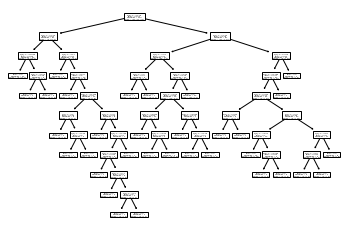

In [26]:
tree.plot_tree(cls);

In [29]:
dot_data = tree.export_graphviz(cls, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Wine_decision_tree")

'Wine_decision_tree.pdf'

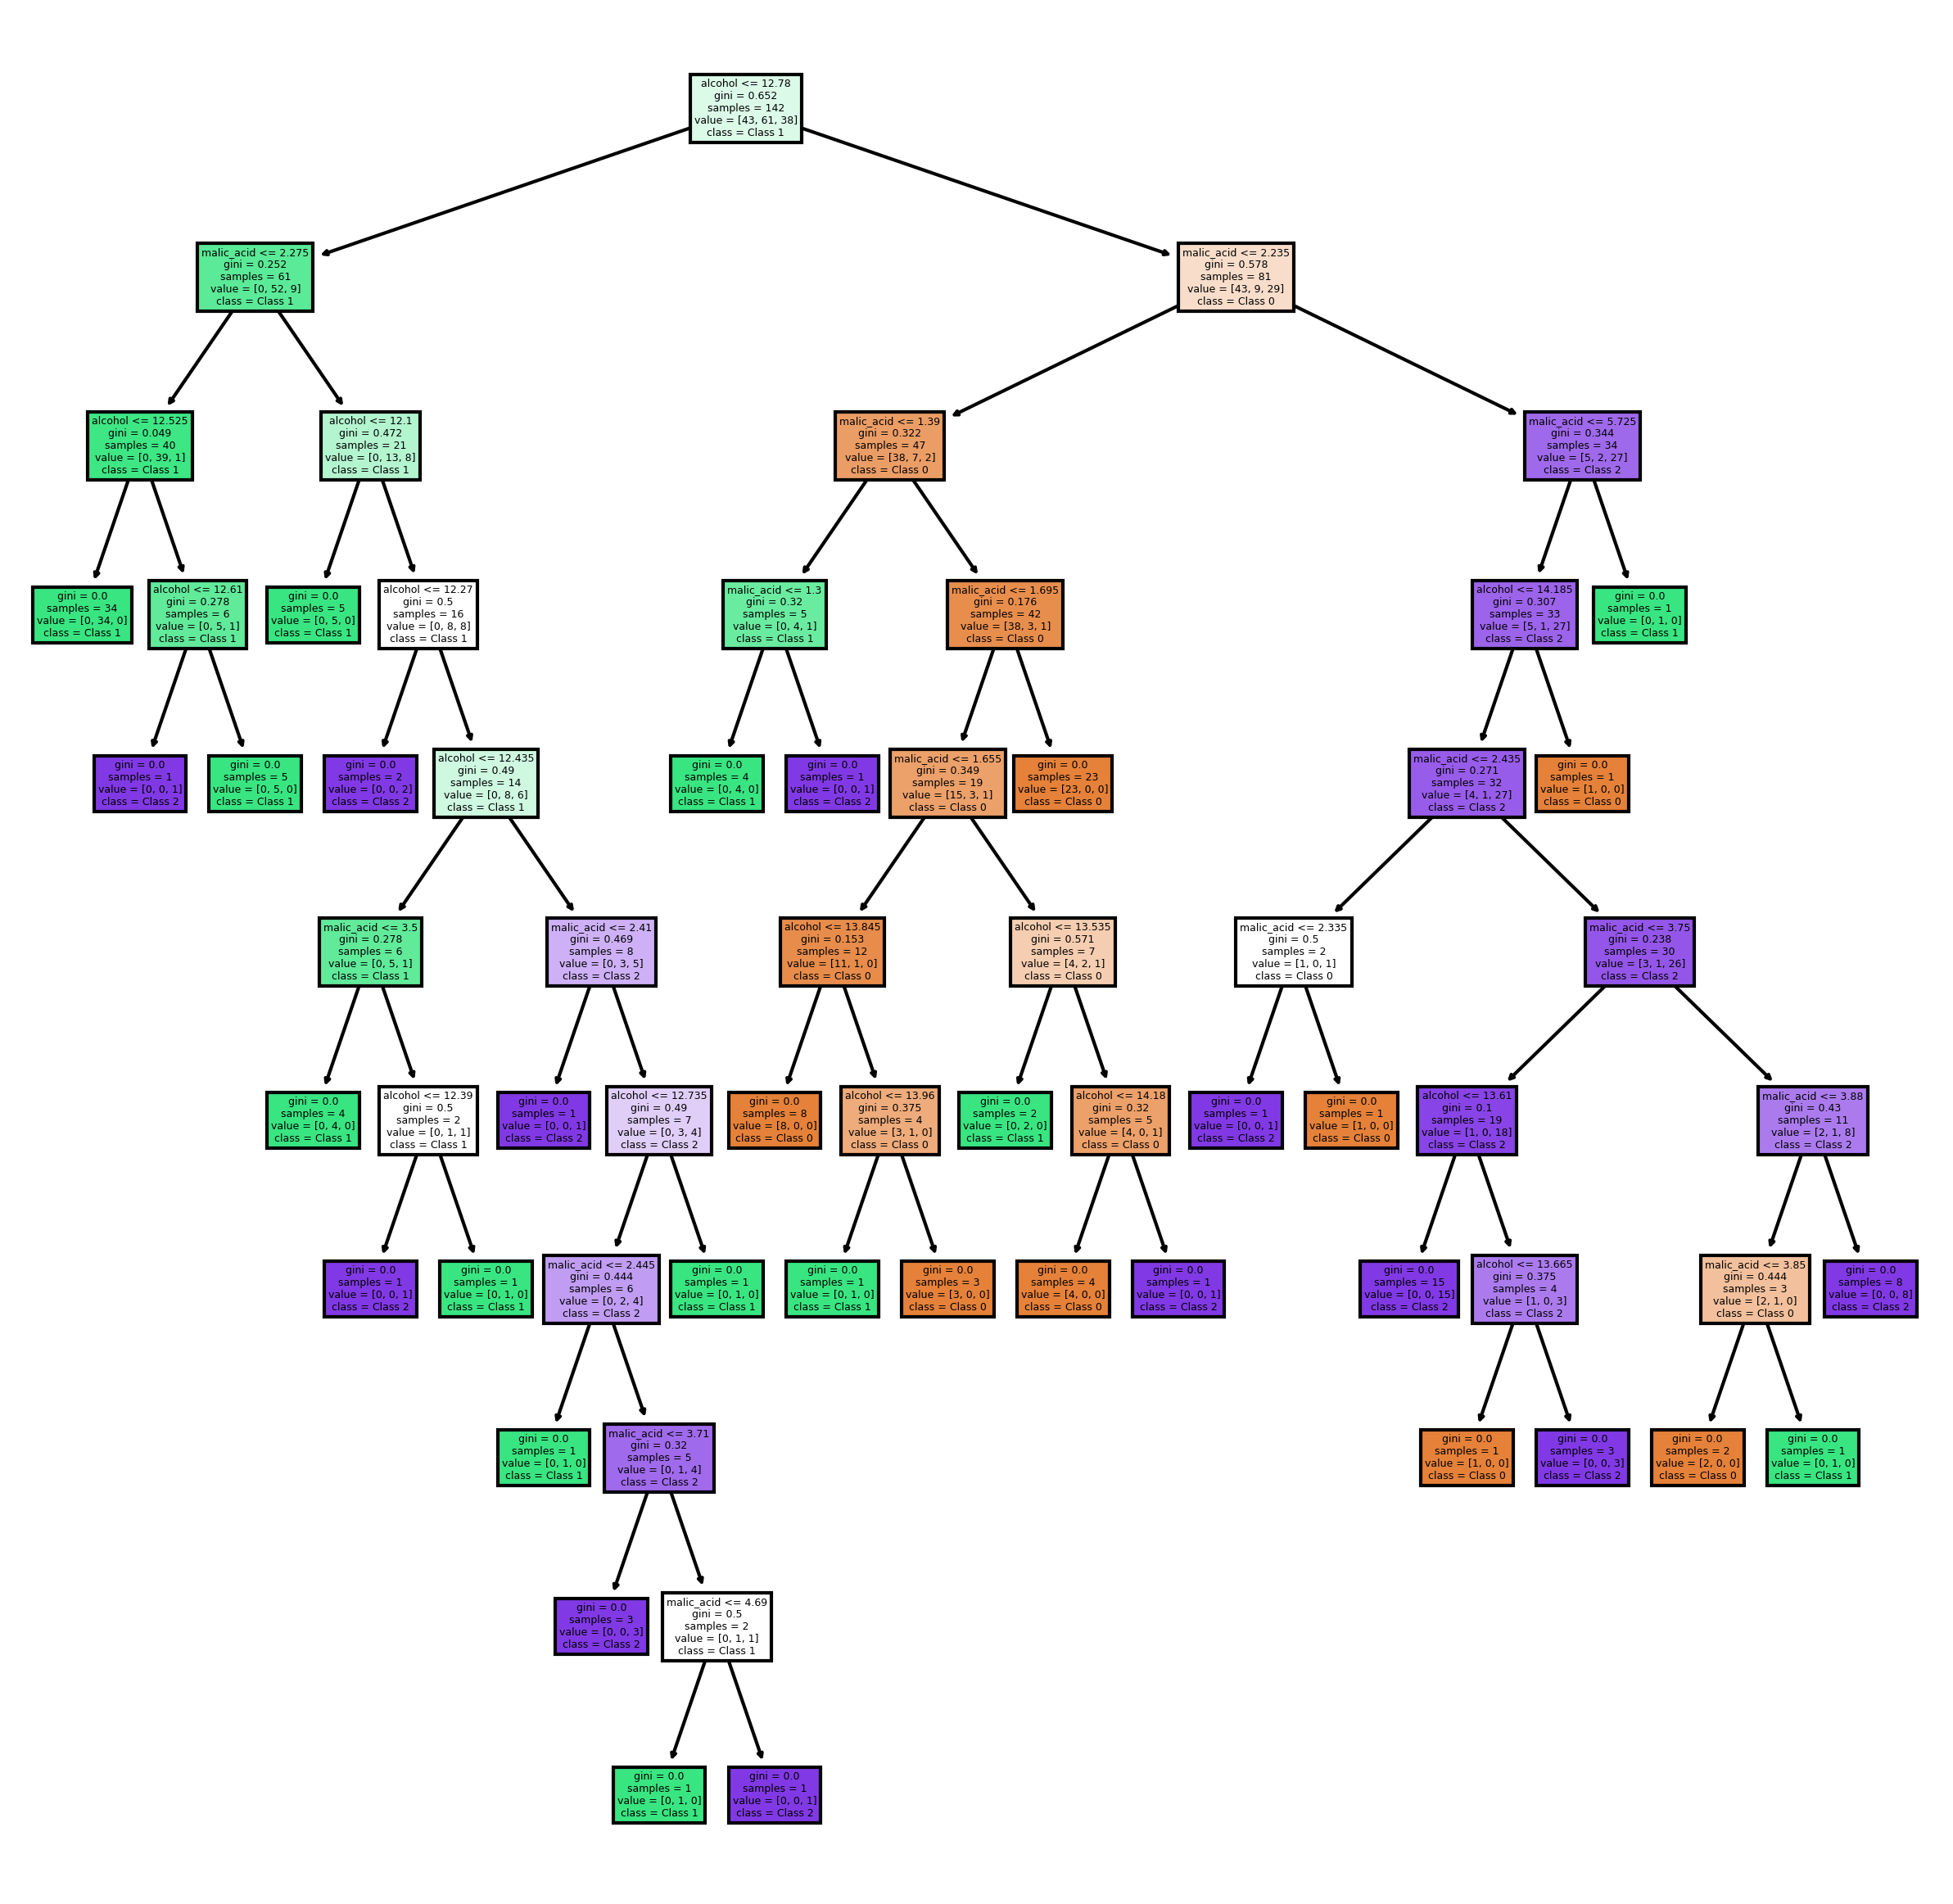

In [33]:
import matplotlib.pyplot as plt

fn=['alcohol','malic_acid']
cn=['Class 0', 'Class 1', 'Class 2' ]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(cls,feature_names = fn,class_names=cn,filled = True);
fig.savefig('imagename.png')

